In [ ]:
!pip install nsepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sys
print(sys.version)

3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]


In [ ]:
pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importing dependencies
from nsepy import get_history as gh
import numpy as np
np.random.seed(1)
import tensorflow as tf
tf.random.set_seed(2)
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers.core import Dense
from keras.layers.recurrent import LSTM
from keras import optimizers
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from math import sqrt
import datetime as dt
import time
plt.style.use('ggplot')
import snscrape.modules.twitter as sntwitter
from textblob import TextBlob
from wordcloud import WordCloud
import re


In [ ]:
start = dt.datetime(2016,1,1)
end = dt.datetime(2022,6,30)


In [ ]:
# Creating list to append tweet data to
attributes_container = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('Chemical AND India since:2016-01-01 until:2022-06-30').get_items()):
    if i>200000:
        break
    attributes_container.append([tweet.date, tweet.content])
    
# Creating a dataframe to load the list
tweets_df = pd.DataFrame(attributes_container, columns=["Date Created", "Tweet"])

In [ ]:
tweets_df

,Date Created,Tweet
0,2022-06-29 16:08:05+00:00,@stockifi_Invest IT industry's contribution to...
1,2022-06-29 15:32:01+00:00,India is where heads of terrorist leaders have...
2,2022-06-29 14:05:04+00:00,"@suryakane Wonder if India, especially the che..."
3,2022-06-29 13:30:20+00:00,"@MoHFW_INDIA \nDear sir ,\npls stop authorizin..."
4,2022-06-29 08:45:01+00:00,A #fire broke out at a chemical #godown in the...
...,...,...
49009,2016-01-01 14:46:01+00:00,#Todayinhistory ( india ) 1st january \n1)Inau...
49010,2016-01-01 12:19:15+00:00,Kedia Chemical Industries https://t.co/1mUNhBv...
49011,2016-01-01 11:20:21+00:00,@Pears_India \n\n#SkinCareResolution \n\nWld ...
49012,2016-01-01 07:41:38+00:00,"Engineer Engineering in Chennai, TN, India: ef..."


In [ ]:
tweets_df1 = tweets_df

In [ ]:
tweets_df2 = tweets_df

In [ ]:
#Clean the text
def cleantext(text):
  tweet = re.sub("@[A-Za-z0-9]+","",text) #Remove @ sign
  tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
  text = re.sub(r'http', ' ', text) #removing http
  text = re.sub(r'#', ' ', text) #removing the '#' symbol
  text = re.sub(r'RT[\s]+', ' ', text) #removing RT

  return text
#Cleaning the text
tweets_df1 = tweets_df1['Tweet'].apply(cleantext)
tweets_df1 = pd.DataFrame(tweets_df1)

In [ ]:
#adding date
tweets_df1['Date Created'] = tweets_df['Date Created']

#swapping the columns
tweets_df1['temp'] = tweets_df1['Date Created']
tweets_df1['Date Created'] = tweets_df1['Tweet']
tweets_df1['Tweet'] = tweets_df1['temp']
tweets_df1.drop(columns=['temp'], inplace=True)
tweets_df1.rename(columns = {'Date Created':'temp1'}, inplace = True)
tweets_df1.rename(columns = {'Tweet':'Date Created'}, inplace = True)
tweets_df1.rename(columns = {'temp1':'Tweet'}, inplace = True)

tweets_df1

,Date Created,Tweet
0,2022-06-29 16:08:05+00:00,@stockifi_Invest IT industry's contribution to...
1,2022-06-29 15:32:01+00:00,India is where heads of terrorist leaders have...
2,2022-06-29 14:05:04+00:00,"@suryakane Wonder if India, especially the che..."
3,2022-06-29 13:30:20+00:00,"@MoHFW_INDIA \nDear sir ,\npls stop authorizin..."
4,2022-06-29 08:45:01+00:00,A fire broke out at a chemical godown in the...
...,...,...
49009,2016-01-01 14:46:01+00:00,Todayinhistory ( india ) 1st january \n1)Inau...
49010,2016-01-01 12:19:15+00:00,Kedia Chemical Industries s://t.co/1mUNhBvDW0...
49011,2016-01-01 11:20:21+00:00,@Pears_India \n\n SkinCareResolution \n\nWld ...
49012,2016-01-01 07:41:38+00:00,"Engineer Engineering in Chennai, TN, India: ef..."


In [ ]:
#Create a function to get Subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Create a function to get polarity
def getpolarity(text):
  return TextBlob(text).sentiment.polarity

#Create two new columns
tweets_df1['Subjectivity'] = tweets_df['Tweet'].apply(getSubjectivity)
tweets_df1['Polarity'] = tweets_df['Tweet'].apply(getpolarity)

In [ ]:
tweets_df1

,Date Created,Tweet,Subjectivity,Polarity
0,2022-06-29 16:08:05+00:00,@stockifi_Invest IT industry's contribution to...,0.43125,0.11875
1,2022-06-29 15:32:01+00:00,India is where heads of terrorist leaders have...,0.25000,0.00000
2,2022-06-29 14:05:04+00:00,"@suryakane Wonder if India, especially the che...",1.00000,0.00000
3,2022-06-29 13:30:20+00:00,"@MoHFW_INDIA \nDear sir ,\npls stop authorizin...",0.56250,-0.25000
4,2022-06-29 08:45:01+00:00,A fire broke out at a chemical godown in the...,0.00000,0.00000
...,...,...,...,...
49009,2016-01-01 14:46:01+00:00,Todayinhistory ( india ) 1st january \n1)Inau...,0.00000,0.00000
49010,2016-01-01 12:19:15+00:00,Kedia Chemical Industries s://t.co/1mUNhBvDW0...,0.00000,0.00000
49011,2016-01-01 11:20:21+00:00,@Pears_India \n\n SkinCareResolution \n\nWld ...,0.80000,0.50000
49012,2016-01-01 07:41:38+00:00,"Engineer Engineering in Chennai, TN, India: ef...",0.80000,0.60000


In [ ]:
tweets_df1['Sentiment Parameter'] = tweets_df1['Subjectivity'] * tweets_df1['Polarity']

tweets_df1.head()

,Date Created,Tweet,Subjectivity,Polarity,Sentiment Parameter
0,2022-06-29 16:08:05+00:00,@stockifi_Invest IT industry's contribution to...,0.43125,0.11875,0.051211
1,2022-06-29 15:32:01+00:00,India is where heads of terrorist leaders have...,0.25000,0.00000,0.000000
2,2022-06-29 14:05:04+00:00,"@suryakane Wonder if India, especially the che...",1.00000,0.00000,0.000000
3,2022-06-29 13:30:20+00:00,"@MoHFW_INDIA \nDear sir ,\npls stop authorizin...",0.56250,-0.25000,-0.140625
4,2022-06-29 08:45:01+00:00,A fire broke out at a chemical godown in the...,0.00000,0.00000,0.000000


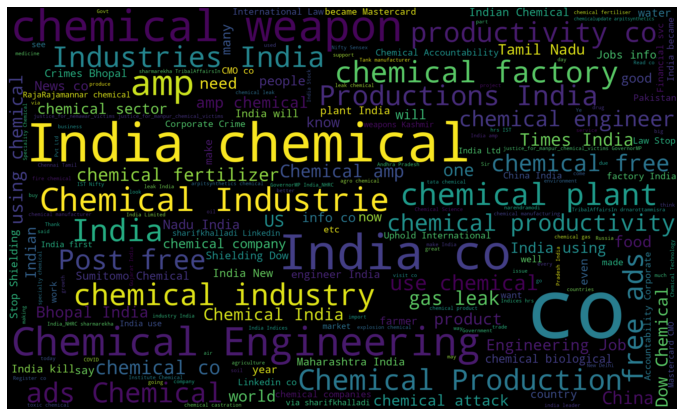

In [ ]:
#Plot the Word Cloud
allwords = ' '.join([twts for twts in tweets_df1['Tweet']])
wordcloud = WordCloud(width =2000, height =1200, random_state =21, max_font_size =250).generate(allwords)

plt.figure(figsize=(12,20))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'

tweets_df1['Analysis']= tweets_df1['Polarity'].apply(getAnalysis)
tweets_df1

,Date Created,Tweet,Subjectivity,Polarity,Sentiment Parameter,Analysis
0,2022-06-29 16:08:05+00:00,@stockifi_Invest IT industry's contribution to...,0.43125,0.11875,0.051211,Positive
1,2022-06-29 15:32:01+00:00,India is where heads of terrorist leaders have...,0.25000,0.00000,0.000000,Neutral
2,2022-06-29 14:05:04+00:00,"@suryakane Wonder if India, especially the che...",1.00000,0.00000,0.000000,Neutral
3,2022-06-29 13:30:20+00:00,"@MoHFW_INDIA \nDear sir ,\npls stop authorizin...",0.56250,-0.25000,-0.140625,Negative
4,2022-06-29 08:45:01+00:00,A fire broke out at a chemical godown in the...,0.00000,0.00000,0.000000,Neutral
...,...,...,...,...,...,...
49009,2016-01-01 14:46:01+00:00,Todayinhistory ( india ) 1st january \n1)Inau...,0.00000,0.00000,0.000000,Neutral
49010,2016-01-01 12:19:15+00:00,Kedia Chemical Industries s://t.co/1mUNhBvDW0...,0.00000,0.00000,0.000000,Neutral
49011,2016-01-01 11:20:21+00:00,@Pears_India \n\n SkinCareResolution \n\nWld ...,0.80000,0.50000,0.400000,Positive
49012,2016-01-01 07:41:38+00:00,"Engineer Engineering in Chennai, TN, India: ef...",0.80000,0.60000,0.480000,Positive


In [ ]:
tweets_df1['Analysis'].value_counts()

Positive    19872
Neutral     19847
Negative     9295
Name: Analysis, dtype: int64

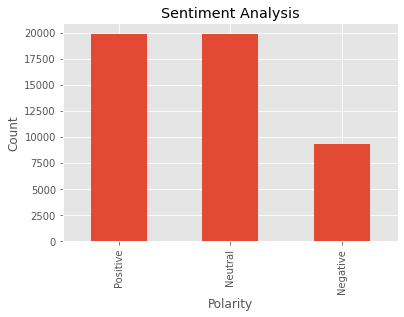

In [ ]:
tweets_df1['Analysis'].value_counts().plot(kind='bar')
plt.title("Sentiment Analysis")
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.show()

In [ ]:
tweets_df1['Date Created'] = pd.to_datetime(tweets_df1['Date Created'])
tweets_df1.set_index('Date Created', inplace=True)
tweets_df1=tweets_df1.groupby(tweets_df1.index.date)['Sentiment Parameter'].mean()

In [ ]:
tweets_df1=pd.DataFrame(tweets_df1)
tweets_df1.index.name = 'Date'
tweets_df1.index=pd.to_datetime(tweets_df1.index)
tweets_df1=tweets_df1.fillna(0)
tweets_df1

,Sentiment Parameter
Date,
2016-01-01,0.160000
2016-01-02,-0.005952
2016-01-03,0.103000
2016-01-04,0.091250
2016-01-05,0.136471
...,...
2022-06-25,0.090913
2022-06-26,0.047877
2022-06-27,0.046006


In [ ]:
df = gh(symbol='TFL',start=start,end=end)
df.tail()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2022-06-24,TFL,EQ,6.90,7.15,7.20,7.15,7.20,7.20,7.17,2278,1.633990e+09,14,2278,1.0000
2022-06-27,TFL,EQ,7.20,7.35,7.55,7.05,7.35,7.35,7.29,7055,5.139855e+09,75,262,0.0371
2022-06-28,TFL,EQ,7.35,7.00,7.70,7.00,7.70,7.70,7.42,10316,7.654900e+09,36,5507,0.5338
2022-06-29,TFL,EQ,7.70,8.05,8.05,8.05,8.05,8.05,8.05,2532,2.038260e+09,7,2532,1.0000
2022-06-30,TFL,EQ,8.05,8.45,8.45,8.45,8.45,8.45,8.45,1046,8.838700e+08,7,1046,1.0000


In [ ]:
#Variables for training
df1 = (df)[['Open','High','Low','Close','Prev Close','VWAP','Turnover','Last','Volume']]
df1=pd.DataFrame(df1)
df1.index=pd.to_datetime(df1.index)
df1


,Open,High,Low,Close,Prev Close,VWAP,Turnover,Last,Volume
Date,,,,,,,,,
2016-01-04,6.00,6.00,6.00,6.00,5.75,6.00,2.940000e+08,6.00,490
2016-01-05,6.20,6.30,6.20,6.30,6.00,6.26,6.260000e+09,6.30,10000
2016-01-06,6.60,6.60,6.00,6.10,6.30,6.20,1.103395e+09,6.10,1781
2016-01-07,6.40,6.40,6.40,6.40,6.10,6.40,1.491200e+09,6.40,2330
2016-01-11,6.70,6.70,6.70,6.70,6.40,6.70,1.340000e+09,6.70,2000
...,...,...,...,...,...,...,...,...,...
2022-06-24,7.15,7.20,7.15,7.20,6.90,7.17,1.633990e+09,7.20,2278
2022-06-27,7.35,7.55,7.05,7.35,7.20,7.29,5.139855e+09,7.35,7055
2022-06-28,7.00,7.70,7.00,7.70,7.35,7.42,7.654900e+09,7.70,10316


In [ ]:
df2 = pd.merge(tweets_df1, df1, how = 'inner', on = 'Date')


In [ ]:
df2

,Sentiment Parameter,Open,High,Low,Close,Prev Close,VWAP,Turnover,Last,Volume
Date,,,,,,,,,,
2016-01-04,0.091250,6.00,6.00,6.00,6.00,5.75,6.00,2.940000e+08,6.00,490
2016-01-05,0.136471,6.20,6.30,6.20,6.30,6.00,6.26,6.260000e+09,6.30,10000
2016-01-06,0.135685,6.60,6.60,6.00,6.10,6.30,6.20,1.103395e+09,6.10,1781
2016-01-07,0.212500,6.40,6.40,6.40,6.40,6.10,6.40,1.491200e+09,6.40,2330
2016-01-11,0.082500,6.70,6.70,6.70,6.70,6.40,6.70,1.340000e+09,6.70,2000
...,...,...,...,...,...,...,...,...,...,...
2022-06-23,0.010964,7.35,7.55,6.85,6.90,7.20,7.06,7.147215e+09,6.85,10123
2022-06-24,0.022566,7.15,7.20,7.15,7.20,6.90,7.17,1.633990e+09,7.20,2278
2022-06-27,0.046006,7.35,7.55,7.05,7.35,7.20,7.29,5.139855e+09,7.35,7055


In [ ]:
df2['Lift']=df2['Close']-df2['Open']

In [ ]:
print(df1.describe().Turnover)
df1.drop(df1[df1['Turnover'] == 0].index, inplace = True)


count    1.037000e+03
mean     1.042867e+10
std      4.530979e+10
min      2.300000e+05
25%      6.713400e+08
50%      2.079735e+09
75%      5.488960e+09
max      8.443940e+11
Name: Turnover, dtype: float64


In [ ]:
# Setting up an early stop
earlystop = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=80,  verbose=1, mode='min')
callbacks_list = [earlystop]

In [ ]:
#Build and train the model
def fit_model(train,val,timesteps,hl,lr,batch,epochs):
    X_train = []
    Y_train = []
    X_val = []
    Y_val = []
  
    # Loop for training data
    for i in range(timesteps,train.shape[0]):
        X_train.append(train[i-timesteps:i])
        Y_train.append(train[i][0])
    X_train,Y_train = np.array(X_train),np.array(Y_train)
  
    # Loop for val data
    for i in range(timesteps,val.shape[0]):
        X_val.append(val[i-timesteps:i])
        Y_val.append(val[i][0])
    X_val,Y_val = np.array(X_val),np.array(Y_val)
    
    # Adding Layers to the model
    model = Sequential()
    model.add(LSTM(X_train.shape[2],input_shape = (X_train.shape[1],X_train.shape[2]),return_sequences = True,
                   activation = 'relu'))
    for i in range(len(hl)-1):        
        model.add(LSTM(hl[i],activation = 'relu',return_sequences = True))
    model.add(LSTM(hl[-1],activation = 'relu'))
    model.add(Dense(1))
    model.compile(optimizer = tf.keras.optimizers.Adam(lr = lr), loss = 'mean_squared_error')
    #print(model.summary())
  
    # Training the data
    history = model.fit(X_train,Y_train,epochs = epochs,batch_size = batch,validation_data = (X_val, Y_val),verbose = 0,
                        shuffle = False, callbacks=callbacks_list)
    model.reset_states()
    return model, history.history['loss'], history.history['val_loss']

In [ ]:
# Evaluating the model
def evaluate_model(model,test,timesteps):
    X_test = []
    Y_test = []

    # Loop for testing data
    for i in range(timesteps,test.shape[0]):
        X_test.append(test[i-timesteps:i])
        Y_test.append(test[i][0])
    X_test,Y_test = np.array(X_test),np.array(Y_test)
    #print(X_test.shape,Y_test.shape)
  
    # Prediction Time 
    Y_hat = model.predict(X_test)
    mae = mean_absolute_error(Y_test,Y_hat)
    r = r2_score(Y_test,Y_hat)
    return mae, r, Y_test, Y_hat

In [ ]:
# Plotting the predictions
def plot_data(Y_test,Y_hat):
    plt.plot(Y_test,c = 'r')
    plt.plot(Y_hat,c = 'y')
    plt.xlabel('Day')
    plt.ylabel('Stock Price')
    plt.title('Stock Prediction Graph using Multivariate-LSTM model')
    plt.legend(['Actual','Predicted'],loc = 'lower right')
    plt.show()

In [ ]:
# Plotting the training errors
def plot_error(train_loss,val_loss):
    plt.plot(train_loss,c = 'r')
    plt.plot(val_loss,c = 'b')
    plt.ylabel('Loss')
    plt.legend(['train','val'],loc = 'upper right')
    plt.show()

In [ ]:
# Extracting the series
series = df2[['Close','Turnover','Lift','Sentiment Parameter']]
print(series.shape)
print(series.tail())

(1036, 4)
            Close      Turnover  Lift  Sentiment Parameter
Date                                                      
2022-06-23   6.90  7.147215e+09 -0.45             0.010964
2022-06-24   7.20  1.633990e+09  0.05             0.022566
2022-06-27   7.35  5.139855e+09  0.00             0.046006
2022-06-28   7.70  7.654900e+09  0.70             0.025603
2022-06-29   8.05  2.038260e+09  0.00            -0.033187


In [ ]:
# Train Val Test Split
train_start = dt.date(2016,1,4)
train_end = dt.date(2019,12,31)
train_data = series.loc[train_start:train_end]


val_start = dt.date(2020,1,1)
val_end = dt.date(2021,6,30)
val_data = series.loc[val_start:val_end]


test_start = dt.date(2021,7,1)
test_end = dt.date(2022,6,30)
test_data = series.loc[test_start:test_end]

print(train_data.shape,val_data.shape,test_data.shape)

(709, 4) (162, 4) (165, 4)


In [ ]:
# Normalisation
sc = MinMaxScaler()
train = sc.fit_transform(train_data)
val = sc.transform(val_data)
test = sc.transform(test_data)
print(train.shape,val.shape,test.shape)

(709, 4) (162, 4) (165, 4)


In [ ]:
timesteps = 50
hl = [40,35] #Neurons in each layer
lr = 1e-3 #Learning rate 0.001
batch_size = 30
num_epochs = 150

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 105: early stopping


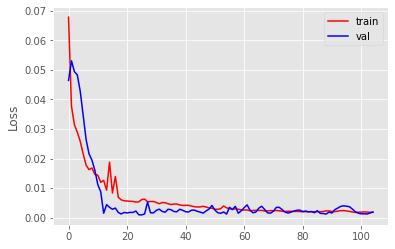

In [ ]:
model,train_error,val_error = fit_model(train,val,timesteps,hl,lr,batch_size,num_epochs)
plot_error(train_error,val_error)

MAE = 0.03759359939944292
R-Squared Score = 0.6693741260168556


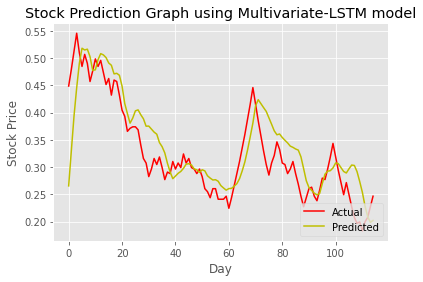

In [ ]:
mae, r2_value,true,predicted = evaluate_model(model,test,timesteps)
print('MAE = {}'.format(mae))
print('R-Squared Score = {}'.format(r2_value))
plot_data(true,predicted)
